### 21.07.26 Team Complete

# lightgbm

In [13]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import  GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error
from lightgbm import LGBMRegressor

import datetime
import matplotlib as mpl
import matplotlib.pylab as plt

In [14]:
seed =2021
np.random.seed(seed)

In [15]:
# 01. 데이터불러오기
df_고추_피망_파프리카_raw = pd.read_csv('고추_피망_파프리카.csv', encoding='cp949')
df_고추_피망_파프리카 = df_고추_피망_파프리카_raw #원본저장

In [16]:
df_고추_피망_파프리카 = df_고추_피망_파프리카.set_index('date') #date를 index로 지정
df_고추_피망_파프리카

,PC1,PC2,고추_피망_파프리카
date,,,
2018-01-01T00:00:00Z,-3.719474,0.965108,130.348193
2018-01-02T00:00:00Z,-3.741912,0.888377,165.836227
2018-01-03T00:00:00Z,-4.074829,0.748572,176.919777
2018-01-04T00:00:00Z,-4.325838,0.235772,182.992995
2018-01-05T00:00:00Z,-3.772842,0.246325,184.223550
...,...,...,...
2019-12-27T00:00:00Z,-3.280702,1.070884,166.974062
2019-12-28T00:00:00Z,-3.036702,0.091263,161.722930
2019-12-29T00:00:00Z,-2.978009,-1.269522,179.795267


## train/ test set split

In [17]:
#03. train/ test 분리
X_train, X_test, y_train, y_test = df_고추_피망_파프리카.iloc[0:365,:-1], df_고추_피망_파프리카.iloc[365:730,:-1],df_고추_피망_파프리카.iloc[0:365,-1], df_고추_피망_파프리카.iloc[365:730,-1]
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((365, 2), (365,), (365, 2), (365,))

## 모델 생성, 학습 및 예측, 평가

In [18]:
#04. 모델 생성 및 학습
lgb_rg = LGBMRegressor()

# 하이퍼 파라미터 확인
lgb_rg.get_params() 

{'boosting_type': 'gbdt',
 'class_weight': None,
 'colsample_bytree': 1.0,
 'importance_type': 'split',
 'learning_rate': 0.1,
 'max_depth': -1,
 'min_child_samples': 20,
 'min_child_weight': 0.001,
 'min_split_gain': 0.0,
 'n_estimators': 100,
 'n_jobs': -1,
 'num_leaves': 31,
 'objective': None,
 'random_state': None,
 'reg_alpha': 0.0,
 'reg_lambda': 0.0,
 'silent': True,
 'subsample': 1.0,
 'subsample_for_bin': 200000,
 'subsample_freq': 0}

In [19]:
# gridsearchCV
params = {
    'max_depth': [1, 2, 3, 4],
    'min_child_samples': [36, 37, 38],
    'learning_rate' : [0.01, 0.02, 0.03],
    'n_estimators' : [500, 501, 502, 503, 504, 505] 
}
gscv_lgb = GridSearchCV(lgb_rg, param_grid=params, cv=10)

In [20]:
# 모형학습
gscv_lgb.fit(X_train,y_train, eval_metric='logloss') 

# 최적파라미터 확인
gscv_lgb.best_params_

{'learning_rate': 0.03,
 'max_depth': 3,
 'min_child_samples': 36,
 'n_estimators': 502}

In [21]:
# 최적파라미터에 대한 평가점수 확인
gscv_lgb.best_score_

-1.9347604819129516

In [22]:
#05. 평가
# test 데이터셋으로 모형 예측 및 평가

# R^2
gscv_xgb_fit = gscv_lgb.best_estimator_
lgb_pred = gscv_xgb_fit.predict(X_test)
r2_score(y_test,lgb_pred)

-0.08917201557487786

In [23]:
# RMSE
mse = mean_squared_error(y_test,lgb_pred)
rmse = np.sqrt(mse)
rmse

23.712567664088866

## 시각화

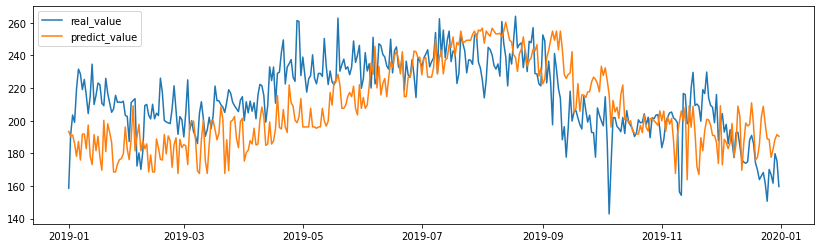

In [24]:
test_date = pd.to_datetime(df_고추_피망_파프리카_raw.iloc[365:730,0].astype('str'))

plt.figure(figsize=(14,4))
plt.plot(test_date, y_test, label='real_value')
plt.plot(test_date, lgb_pred, label='predict_value')
plt.legend(loc='upper left')
plt.show()